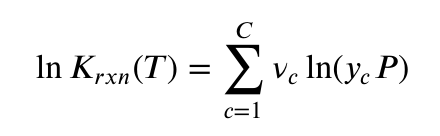

Strategia rozwiązania tego problemu jest użycie równania Van't Hoffa w celu napisania funkcji w języku Python, by wyznaczyć lewą stronę równania jako funkcję temperatury i bilanse składników w celu wyznaczenia współczynników po prawej stronie równania jako funkcję wydajności reakcji. Następnie, w danej temperaturze oraz ciśnieniu, równanie jest rozwiązane używając algorytmu poszukującego pierwiastka w celu wyznaczenia równowagi obu stron.

### Inicjalizacja

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Dane dotyczące reaktora

In [2]:
# Warunki
P = 20
Tmin = 800
Tmax = 1200

# Specyfikacja paliwa

nIn = dict()
nIn['CH4'] = 1
nIn['H2O'] = 1.2*nIn['CH4']
nIn['CO'] = 0
nIn['H2'] = 0

# Lista komponentów
C = nIn.keys()

### Dane

In [3]:
#Entalpie molowe oraz swobodne związków występujących w reakcji (w warunkach standardowych).

Gf = dict()
Hf = dict()

Gf['CO'] = -137270
Hf['CO'] = -110530

Gf['H2'] = 0
Hf['H2'] = 0

Gf['CH4'] = -50490
Hf['CH4'] = -74520

Gf['H2O'] = -228590
Hf['H2O'] = -241830

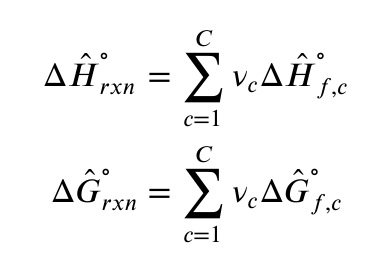

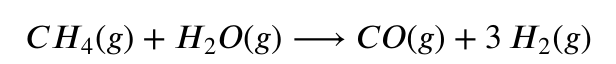

In [4]:
# Stechiometria reakcji
nu = dict()
nu['CO']  = +1
nu['H2']  = +3
nu['CH4'] = -1
nu['H2O'] = -1

Hr = sum([nu[c]*Hf[c] for c in C])
print("Hr = {:7.3f} kJ/gmol".format(Hr/1000))

Gr = sum([nu[c]*Gf[c] for c in C])
print("Gr = {:7.3f} kJ/gmol".format(Gr/1000))

Hr = 205.820 kJ/gmol
Gr = 141.810 kJ/gmol


### Stała równowagi Van't Hoffa

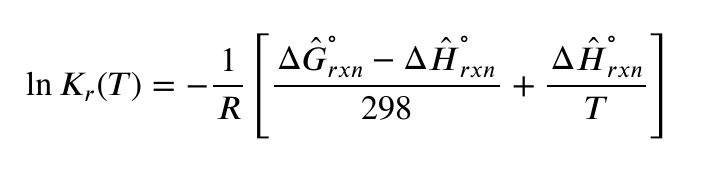

Za pomocą funkcji Pythona lambda jako funkcja T:

In [5]:
R = 8.314 # J/K/gmol
def lnKr(T):
    return -((Gr-Hr)/298 + Hr/T)/R

Zależność można przedstawić na wykresie

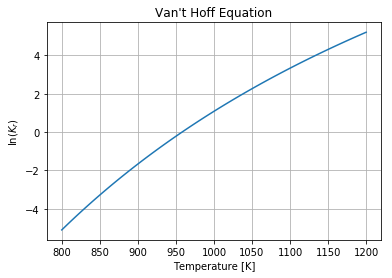

In [6]:
T = np.linspace(Tmin,Tmax,100)
plt.plot(T,[lnKr(T) for T in T])
plt.xlabel('Temperature [K]')
plt.ylabel('$\ln(K_{r})$')
plt.title('Van\'t Hoff Equation')
plt.grid()

### Bilans wy-we

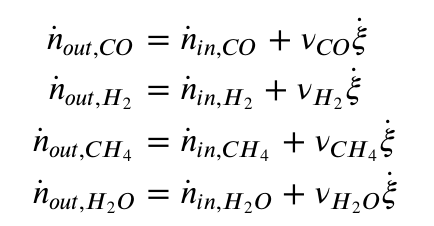

Bilans jest rozpisany jako funkcja produktów reakcji w celu ustalenie strumienia molowego na wylocie z reaktora.

In [7]:
nOut = dict()
for c in C:
    nOut[c] = lambda x,c=c: nIn[c] + nu[c]*x

Strumień molowy na wylocie może zostać przedstawiony na wykresie jako funkcja produktów reakcji. Pierwszym krokiem jest wyznaczenie możliwie maksymalnej produkcji (w reakcji), a następnie przedstawienie każdego ze strumieni jako funkcja produkcji.

Maksymalna molowa produkcja reakcji = 1.00


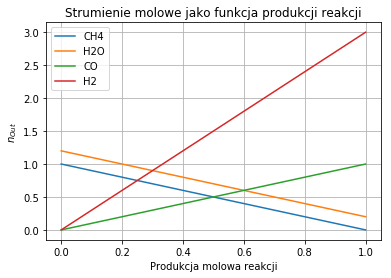

In [8]:
xMax = np.Inf
for c in C:
    if nu[c] < 0:
        xMax = min(xMax,-nIn[c]/nu[c])

print('Maksymalna molowa produkcja reakcji = {:.2f}'.format(xMax))

x = np.linspace(0,xMax)

for c in C:
    plt.plot(x,[nOut[c](x) for x in x])
plt.legend(C)
plt.xlabel('Produkcja molowa reakcji')
plt.ylabel('$n_{Out}$')
plt.title('Strumienie molowe jako funkcja produkcji reakcji')
plt.grid()
# plt.savefig('2.outletMolarFlows.png', dpi=96)

### Skład gazów wylotowych reaktora

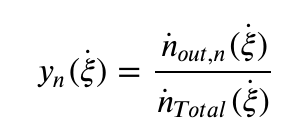

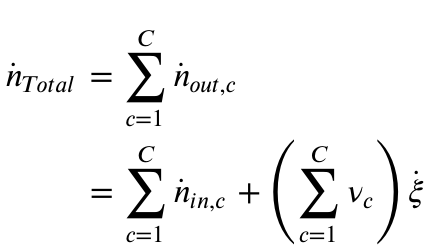

Całkowity strumień molowy jest przedstawiona za pomocą funkcji:

In [9]:
def nTotal(x):
    nTotal = 0
    for c in C:
        nTotal += nOut[c](x)
    return nTotal

Która posłużyła następnie do stworzenia słownika (w języku Python) funkcji lambda składu odcieku jako funkcji produkcji reaktora.

In [10]:
y = dict()
for c in C:
    y[c] = lambda x,c=c: nOut[c](x)/nTotal(x)

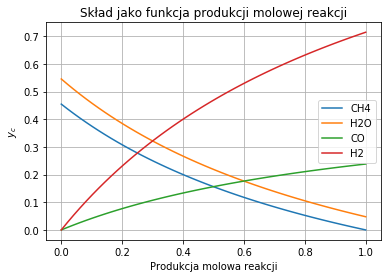

In [11]:
x = np.linspace(0,1)
for c in C:
    plt.plot(x,[y[c](x) for x in x])
plt.legend(C)
plt.xlabel('Produkcja molowa reakcji')
plt.ylabel('$y_c$')
plt.title('Skład jako funkcja produkcji molowej reakcji')
plt.grid()

### Iloraz reakcji

For a gas phase reaction involving a mixture of ideal gases, we define a reaction quotient as

$$K_a(\dot{\xi}) = \prod_{c=1}^C \left(y_c(\dot{\xi})P\right)^{\nu_c}$$

where $y_c(\dot{\xi})P$ is the partial pressure of component $c$. Taking the logarithm

$$ \ln K_a(\dot{\xi}) = \sum_{c=1}^C \nu_c\ln(y_c(\dot{\xi})P)$$

This is implemented as a Python function.

In [12]:
def lnKa(x):
    lnKa = 0;
    for c in C:
        lnKa += nu[c]*np.log(P*y[c](x))
    return lnKa

/home/wojtek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


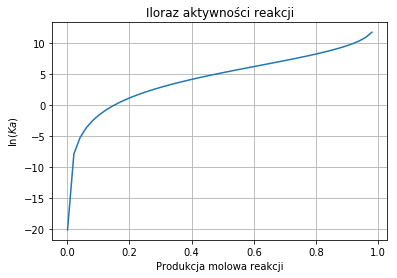

In [13]:
x = np.linspace(0.001,1)
plt.plot(x,[lnKa(x) for x in x])
plt.xlabel('Produkcja molowa reakcji')
plt.ylabel('$\ln(Ka)$')
plt.title('Iloraz aktywności reakcji');
plt.grid()

### Wyznaczanie równowagi reakcji

Dla zadanej temperatury i ciśnienia rozwiązanie równowagowe jest wartością 𝜉˙ dla której 𝐾𝑟(𝑇)=𝐾𝑎(𝜉˙), które można zapisać w formie logarytmów jako:

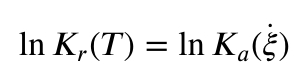

Wyrysowanie tych funkcji i porównanie ich wskazuje prostą technikę graficzną na znalezienie rozwiązań 𝜉˙.

/home/wojtek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


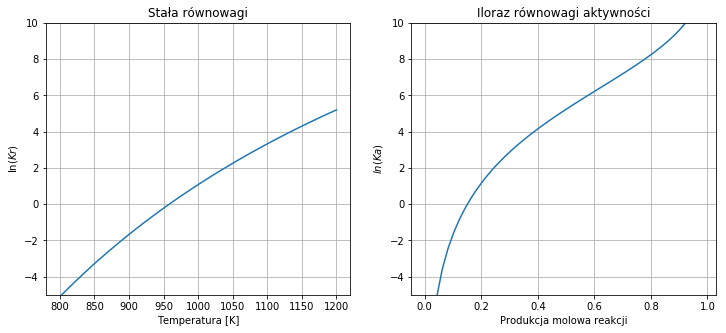

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(T,[lnKr(T) for T in T])
plt.ylim(-5,10)
plt.xlabel('Temperatura [K]')
plt.ylabel('$\ln(Kr)$')
plt.title('Stała równowagi')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x,[lnKa(x) for x in x])
plt.ylim(-5,10)
plt.xlabel('Produkcja molowa reakcji')
plt.ylabel('$ln(Ka)$')
plt.title('Iloraz równowagi aktywności')
plt.grid()

We'll let $\dot{\xi}_{eq}(T)$ denote equilibrium value of the extent as a function of temperature. Those values are defined as roots to the equation

$$ \ln K_a(\dot{\xi}_{eq}(T)) - \ln K_r(T) = 0$$

This implemented as a Python lambda function where a root=finding algorithm is used to solve the equilibrium condition as a function of temperature.

In [15]:
from scipy.optimize import brentq as fzero

xEquil = lambda T: fzero(lambda x: lnKa(x) - lnKr(T), 0, xMax)

/home/wojtek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


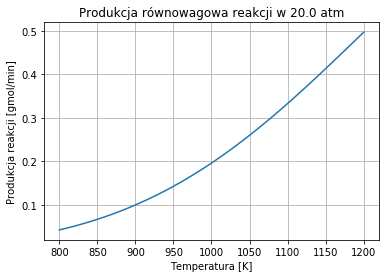

In [16]:
plt.plot(T,[xEquil(T) for T in T])
plt.xlabel('Temperatura [K]')
plt.ylabel('Produkcja reakcji [gmol/min]')
plt.title('Produkcja równowagowa reakcji w {:.1f} atm'.format(P))
plt.grid()

### Skład równowagowy

Ponieważ mamy funkcję, za pomocną której możemy wyznaczyć równowagową produkcję reakcji jako funkcję temperatury, możemy wyznaczyć szeroki zakres wskaźników sprawności dla reaktora. Dla przykładu możemy użyć funkcji uprzednio stworzonych dla składu gazów wylotowych by wyznaczyć i wykreślić skład gazów wylotowych jako funkcję temperatury.

/home/wojtek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


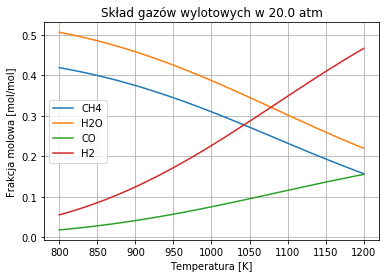

In [17]:
yEquil = dict()
for c in C:
    yEquil[c] = lambda T,c=c: y[c](xEquil(T))

for c in C:
    plt.plot(T,[yEquil[c](T) for T in T])

plt.legend(C)
plt.xlabel('Temperatura [K]')
plt.ylabel('Frakcja molowa [mol/mol]')
plt.title('Skład gazów wylotowych w {:.1f} atm'.format(P))
plt.grid()

### Methane Conversion

$$f_{conv} = \frac{\dot{n}_{in,CH_4} - \dot{n}_{out,CH_4}}{\dot{n}_{in,CH_4}}$$

/home/wojtek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


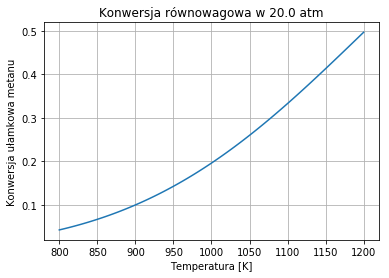

In [18]:
fconv = lambda T: (nIn['CH4'] - nOut['CH4'](xEquil(T)))/nIn['CH4']

plt.plot(T,[fconv(T) for T in T])
plt.xlabel('Temperatura [K]')
plt.ylabel('Konwersja ułamkowa metanu')
plt.title('Konwersja równowagowa w {:.1f} atm'.format(P))
plt.grid()

### Powtórzenie kalkulacji dla różnych ilości wody i metanu na wlocie

In [22]:
coef = 0.5

# coef = np.linspace(1,11,10)

# nIn['CH4'] = 1
# nIn['H2O'] = coef*nIn['CH4']

In [23]:
from scipy.optimize import brentq as fzero

# xEquil = lambda T: fzero(lambda x: lnKa(x) - lnKr(900), 0, xMax)

Dla stałej wartości temperatury zmieniając nadmiar pary wodnej otrzymujemy:

In [24]:
# i = 1
# while i < 6:
#   print(i)
#   i += 1

while coef < 3:
  nIn['CH4'] = 1
  nIn['H2O'] = coef*nIn['CH4']
  xEquil = lambda T: fzero(lambda x: lnKa(x) - lnKr(900), 0, xMax)
  print(xEquil(T))
  coef += 0.1

# plt.plot(T,[xEquil(T) for T in T])

# plt.xlabel('Temperature [K]')
# plt.ylabel('Extent of Reaction [gmol/min]')
# plt.title('Equilibrium Extent of Reaction at {:.1f} atm'.format(P))
# plt.grid()

0.0
0.0
0.0
0.0
0.0
0.0
0.09546697238444858
0.09983218111865252
0.10409255655220813
0.10825927169540149
0.11234139903207721
0.11634643566873841
0.12028067096447329
0.12414945051309151
0.12795736996541204
0.13170842014596482
0.1354060976220829
0.13905349026764363
0.14265334441360128
0.1462081182196817
0.14972002458602487
0.1531910660190405
0.1566230632336634
0.16001767882530205
0.16337643702128385


/home/wojtek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/wojtek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


TODO 

~~1. Repeat the calculations for different operating pressures. How does equilibrium extent of reaction depend on operating pressure?  Why is this the case?~~
2. Repeat the calculations for different feed ratios for water and methane. How does extent of reaction depend on the feed ratio of water?
3. Find component heat capacity data, then write a function to compute the heat requirement for the reactor. If the reactor is operated adiabatically, what is the temperature difference between the inlet and outlet streams?
4. (03.11.2018) Umieścić wartości xEquil w nowym słowniku i elementy tego słownika przedstawić na wykresie